# Battleship Field Validator

Below I present my solution of codewars's eponymous kata ([link](https://www.codewars.com/kata/52bb6539a4cf1b12d90005b7/python)). 

The goal is to create a function that takes a field for well-known board game "Battleship" as an argument and returns true if it has a valid disposition of ships, otherwise returns false. Argument is guaranteed to be 10x10 2D array. Elements in the array are numbers, 0 if the cell is free and 1 if occupied by ship.

Battleship (also Battleships or Sea Battle) is a guessing game for 2 players. Each player has a 10x10 grid containing several "ships" and objective is to destroy enemy's forces by targetting individual cells on his field. The ship occupies one or more cells in the grid. Size and number of ships may differ from version to version.

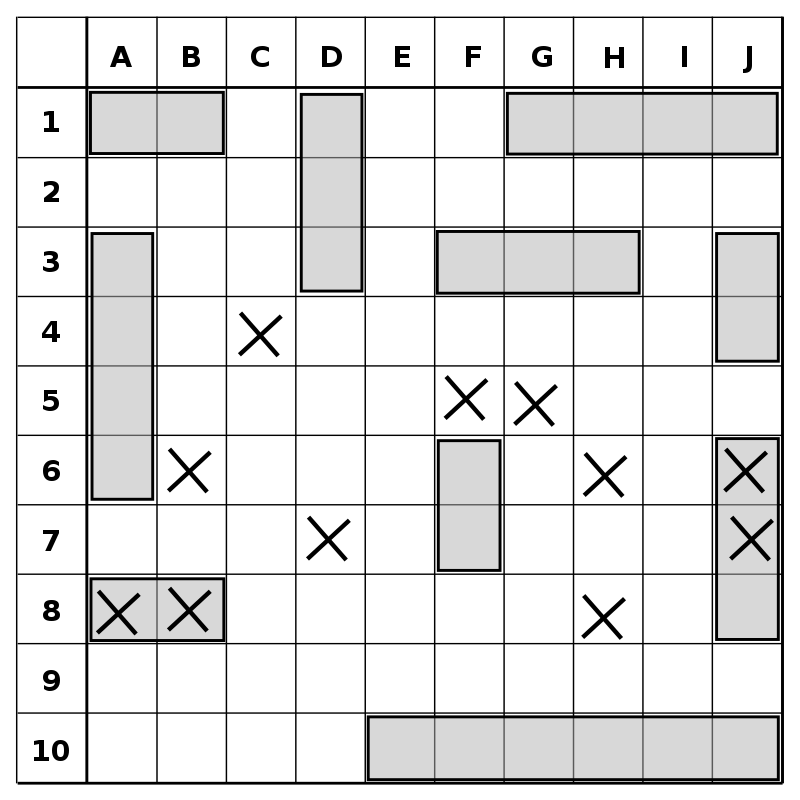

Before the game begins, players set up the board and place the ships accordingly to the following rules:
 - There must be single battleship (size of 4 cells), 2 cruisers (size 3), 3 destroyers (size 2) and 4 submarines (size 1). Any additional ships are not allowed, as well as missing ships.
 - Each ship must be a straight line, except for submarines, which are just single cell.

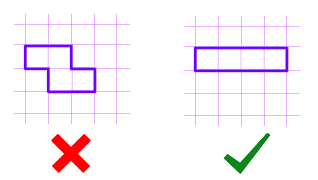

 - The ship cannot overlap or be in contact with any other ship, neither by edge nor by corner.

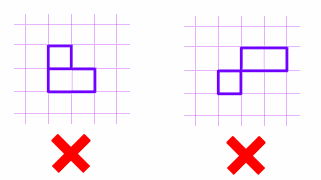

If you're interested in more information about the game, visit this [link](https://en.wikipedia.org/wiki/Battleship_(game)).

Please see my solution below.

In [1]:
def validate_battlefield(field):
    
    import numpy as np
    
    field = np.array(field)
    
    # Test battlefield for presence of ships occupying 5+ cells
    five_consecutive_cells_test = False
    for i in range(0,10):
        for j in range(0,6):
            if (field[i,j:j+5] == np.ones(5)).all() or (field[j:j+5,i] == np.ones(5)).all():
                five_consecutive_cells_test = True
    
    # Test battlefield for ships contacting by corner
    contact_by_corner = False
    for i in range(1,9):
        for j in range(1,9):
            if field[i,j] == 1 and (field[i-1,j-1] == 1 or field[i+1,j-1] == 1 or field[i+1,j+1] == 1 or field[i-1,j+1] == 1):
                contact_by_corner = True

    # Test battlefield for ships contacting by edge
    contact_by_edge = False
    for i in range(1,9):
        for j in range(0,9):
                if (field[i,j:j+2] == np.ones(2)).all() and (field[i-1,j] == 1 or field[i+1,j] == 1 or field [i-1,j+1] == 1 or field[i+1,j+1] == 1):
                    contact_by_edge = True
    
    # Find all battleships in battlefield and change respective cells from 1 to 0 in order to exclude them for further search of smaller ships
    battleship = np.ones(4)
    battleship_quantity = 0
    for i in range(0,10):
        for j in range(0,7):
            if (field[i,j:j+4] == battleship).all():
                battleship_quantity += 1
                field[i,j:j+4] = np.zeros(4)
            if (field[j:j+4,i] == battleship).all():
                battleship_quantity += 1
                field[j:j+4,i] = np.zeros(4)

    # Find all cruisers in battlefield and change respective cells from 1 to 0 in order to exclude them for further search of smaller ships
    cruiser = np.ones(3)
    cruiser_quantity = 0
    for i in range(0,10):
        for j in range(0,8):
            if (field[i,j:j+3] == cruiser).all():
                cruiser_quantity += 1
                field[i,j:j+3] = np.zeros(3)
            if (field[j:j+3,i] == cruiser).all():
                cruiser_quantity += 1
                field[j:j+3,i] = np.zeros(3)

    # Find all destroyers in battlefield and change respective cells from 1 to 0 in order to exclude them for further search of smaller ships
    destroyer = np.ones(2)
    destroyer_quantity = 0
    for i in range(0,10):
        for j in range(0,9):
            if (field[i,j:j+2] == destroyer).all():
                destroyer_quantity += 1
                field[i,j:j+2] = np.zeros(2)
            if (field[j:j+2,i] == destroyer).all():
                destroyer_quantity += 1
                field[j:j+2,i] = np.zeros(2)

    # Find all submarines in battlefield
    submarine = 1
    submarine_quantity = 0
    for i in range(0,10):
        for j in range(0,10):
            if field[i,j] == submarine:
                submarine_quantity += 1

    # Validate battlefield
    if five_consecutive_cells_test == True:
        return False
    elif contact_by_corner == True:
        return False
    elif contact_by_edge == True:
        return False
    elif [battleship_quantity,cruiser_quantity,destroyer_quantity,submarine_quantity] != [1,2,3,4]:
        return False
    else:
        return True

# Examples of my code in action

battleField_1 is ok to start a game, so my function should return True.

In [3]:
battleField_1 = [[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [4]:
validate_battlefield(battleField_1)

True

battleField_2 is not ok because unwanted ships are present. So my validator should return False.

In [8]:
battleField_2 = [[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
validate_battlefield(battleField_2)

False

battleField_3 is also not ok because number of ships of some type is incorrect. So my validator should return False.

In [10]:
battleField_3 = [[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [11]:
validate_battlefield(battleField_3)

False

battleField_4 is also not ok because some ships are missing. So my validator should return False.

In [13]:
battleField_4 = [[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [14]:
validate_battlefield(battleField_4)

False

battleField_5 is also not ok because some ships are in contact. So my validator should return False.

In [15]:
battleField_5 = [[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [16]:
validate_battlefield(battleField_5)

False

battleField_6 is also not ok because some ships has incorrect shape (non-straight). So my validator should return False.

In [17]:
battleField_6 = [[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [1, 1, 0, 0, 1, 1, 1, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [18]:
validate_battlefield(battleField_6)

False

battleField_7 is also not ok because number and length of ships is not ok. So my validator should return False.

In [19]:
battleField_7 = [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
                 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [20]:
validate_battlefield(battleField_7)

False